In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
jst=pd.read_csv("Employee_joining_status.csv")
Hr=pd.read_csv("hr_Hiring_details.csv")
Mapping=pd.read_csv("LOB_mapping_P4.csv")

In [36]:
combine = pd.merge(Hr,Mapping, on='LOB_id', how='outer')

In [37]:
combine = combine.sort_values(['Sno'])

In [38]:
combine_csv=pd.merge(combine,jst, on='Candidate Ref', how='outer')
del combine_csv['Unnamed: 17']

In [39]:
m1=combine_csv['Offered band'].mode()
m1[0]
combine_csv['Offered band']=combine_csv['Offered band'].fillna(m1[0])

In [40]:
combine_csv.drop_duplicates(subset ="Candidate Ref",
                     keep = False, inplace = True)

In [41]:
combine_csv

Sno  Candidate Ref DOJ Extended  Duration to accept offer  \
0         1        2110407          Yes                        14   
1         2        2112635           No                        18   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice period Offered band  Pecent hike expected in CTC  \
0                30           E2                       -20.79   
1                30           E2                        50.00   
2                45           E2                        42.84   
3                30           E2                        42.84   
4               120           E2                        42.59   
...             ...          ...                          ...   
8990              0           E1                       191.67   
8991              0           E1                       150.00   
8992              0           E2                        35.42   
8993             30           E1                        76.92   
8994              0           E1                        45.25   

      Percent hike offered in CTC  Percent difference CTC Joining Bonus  \
0                           13.16                   42.86            No   
1                          320.00                  180.00            No   
2                           42.84                    0.00            No   
3                           42.84                    0.00            No   
4                           42.59                    0.00            No   
...                           ...                     ...           ...   
8990                       191.67                    0.00            No   
8991                       150.00                    0.00            No   
8992                        35.42                    0.00            No   
8993                        53.85                  -13.04            No   
8994                        14.09                  -21.45            No   

     Candidate relocate actual  Gender   Candidate Source  Rex in Yrs  \
0                           No  Female             Agency           7   
1                           No    Male  Employee Referral           8   
2                           No    Male             Agency           4   
3                           No    Male  Employee Referral           4   
4                          Yes    Male  Employee Referral           6   
...                        ...     ...                ...         ...   
8990                        No    Male  Employee Referral           1   
8991                        No  Female             Direct           3   
8992                        No    Male             Direct           5   
8993                        No    Male             Direct           4   
8994                        No  Female  Employee Referral           1   

     Location   Age  LOB_id    LOB  Status  
0       Noida  34.0       1    ERS  Joined  
1     Chennai  34.0       2  INFRA  Joined  
2       Noida  27.0       2  INFRA  Joined  
3       Noida  34.0       2  INFRA  Joined  
4       Noida  34.0       2  INFRA  Joined  
...       ...   ...     ...    ...     ...  
8990  Chennai  34.0       1    ERS  Joined  
8991  Chennai  34.0       4   BFSI  Joined  
8992    Noida  34.0       2  INFRA  Joined  
8993    Noida  34.0       2  INFRA  Joined  
8994  Chennai  34.0       2  INFRA  Joined  

[8995 rows x 19 columns]

In [42]:
data = combine_csv.select_dtypes(include=np.number)
data

Sno  Candidate Ref  Duration to accept offer  Notice period  \
0         1        2110407                        14             30   
1         2        2112635                        18             30   
2         3        2112838                         3             45   
3         4        2115021                        26             30   
4         5        2115125                         1            120   
...     ...            ...                       ...            ...   
8990  12319        3822427                         4              0   
8991  12327        3828206                         2              0   
8992  12331        3834159                         0              0   
8993  12332        3835433                         0             30   
8994  12333        3836076                         2              0   

      Pecent hike expected in CTC  Percent hike offered in CTC  \
0                          -20.79                        13.16   
1                           50.00                       320.00   
2                           42.84                        42.84   
3                           42.84                        42.84   
4                           42.59                        42.59   
...                           ...                          ...   
8990                       191.67                       191.67   
8991                       150.00                       150.00   
8992                        35.42                        35.42   
8993                        76.92                        53.85   
8994                        45.25                        14.09   

      Percent difference CTC  Rex in Yrs   Age  LOB_id  
0                      42.86           7  34.0       1  
1                     180.00           8  34.0       2  
2                       0.00           4  27.0       2  
3                       0.00           4  34.0       2  
4                       0.00           6  34.0       2  
...                      ...         ...   ...     ...  
8990                    0.00           1  34.0       1  
8991                    0.00           3  34.0       4  
8992                    0.00           5  34.0       2  
8993                  -13.04           4  34.0       2  
8994                  -21.45           1  34.0       2  

[8995 rows x 10 columns]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

-Linear regression

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

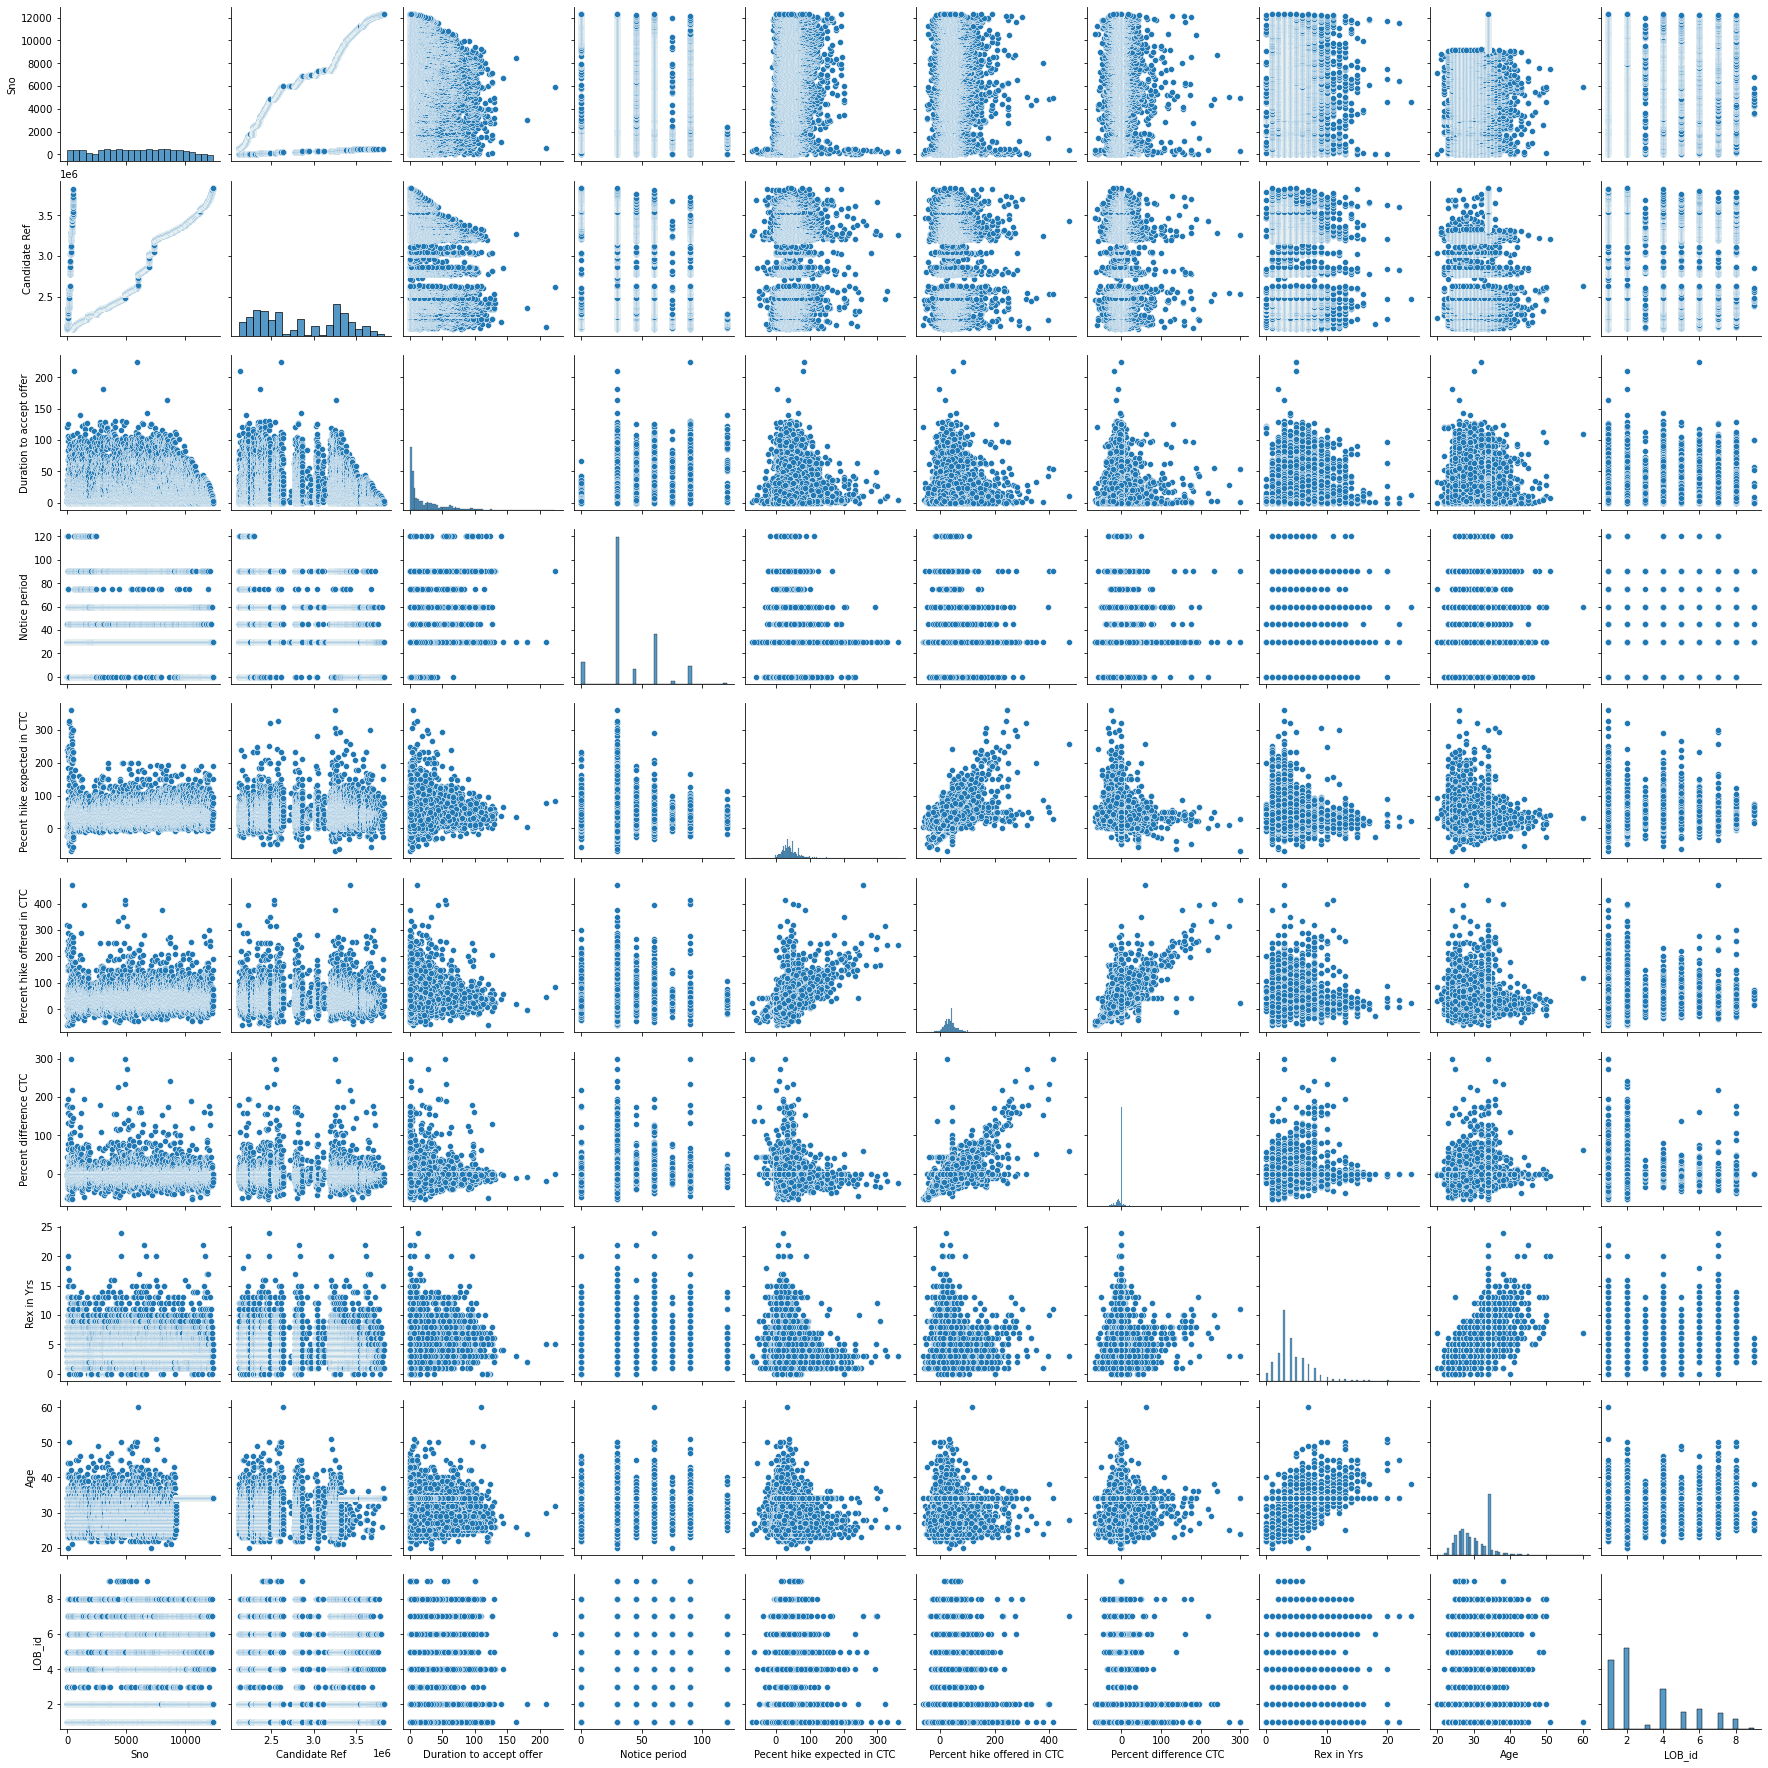

In [32]:
sns.pairplot(combine_csv)

In [33]:
combine_csv.columns

Index(['Sno', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'Location', 'Age', 'LOB_id', 'LOB',
       'Status'],
      dtype='object')